集群中心的座標: [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
實際: [1, 1, 1, 0, 0, 0]
預測[1,1],[2.3,2.1]: [1 0]


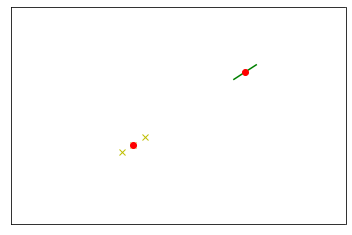

In [11]:
import numpy as np

from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from time import time 

import matplotlib.pyplot as plt

from sklearn import metrics

X=np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
y=[1,1,1,0,0,0]
kmeans = KMeans(n_clusters=2,random_state=0).fit(X)#KMeans演算法 指定2類資料
print("集群中心的座標:",kmeans.cluster_centers_)#取得集群中心的座標
print("預測:",kmeans.predict(X)) #預測
print("實際:",y)#真實答案
print("預測[1,1],[2.3,2.1]:",kmeans.predict([[1,1],[2.3,2.1]]))#預測資料

plt.axis([0,3,0,3])#用圖片顯示
plt.plot(X[:3,0],X[:3,1],'yx')#黃色點
plt.plot(X[3:,0],X[3:,1],'g')#綠色點
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ro')#顯示中心點
plt.xticks(())
plt.yticks(())
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from sklearn import metrics

#取得花資料
iris=datasets.load_iris()
##拆分資料80:20，訓練與測試用 2類標籤答案
iris_X_train,iris_X_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,test_size=0.2)
##KMeans 演算法 2類標籤答案
kmeans=KMeans(n_clusters=3) ##修改成3 較準
kmeans_fit=kmeans.fit(iris_X_train) ###訓練，沒有標籤答案

print("實際",iris_y_train)##顯示標籤答案
print("預測",kmeans_fit.labels_)##顯示預測答案

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)#顯示調整後的預測

score=metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))

print('準確率{0:f}'.format(score))#顯示準確率



實際 [2 0 0 0 0 0 1 2 1 0 2 0 1 0 2 2 1 1 0 2 1 0 1 2 2 2 1 0 0 1 1 0 1 0 1 1 0
 1 2 1 1 1 2 0 2 1 2 1 0 2 0 1 1 1 2 2 0 2 0 2 0 1 0 1 0 1 1 0 1 2 0 0 2 2
 1 0 2 0 2 2 1 2 0 0 2 1 2 2 1 1 1 0 2 1 0 2 0 1 1 0 2 1 1 2 2 1 0 0 0 1 1
 0 1 2 2 2 2 2 2 0]
預測 [2 1 1 1 1 1 0 2 0 1 0 1 0 1 0 2 0 0 1 2 0 1 0 2 2 2 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 0 0 2 1 2 0 2 0 1 2 1 2 0 0 2 2 1 2 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 2
 2 1 2 1 2 0 0 2 1 1 2 0 0 2 0 0 0 1 0 0 1 2 1 0 0 1 0 0 0 0 2 0 1 1 1 0 0
 1 0 2 2 2 2 2 0 1]
調整 [2 1 1 1 1 1 0 2 0 1 2 1 0 1 2 2 0 0 1 2 0 1 0 2 2 2 0 1 1 0 0 1 0 1 0 0 1
 0 2 0 0 0 2 1 2 0 2 0 1 2 1 0 0 0 2 2 1 2 1 2 1 0 1 0 1 0 0 1 0 2 1 1 2 2
 0 1 2 1 2 2 0 2 1 1 2 0 2 2 0 0 0 1 2 0 1 2 1 0 0 1 2 0 0 2 2 0 1 1 1 0 0
 1 0 2 2 2 2 2 2 1]
準確率0.883333


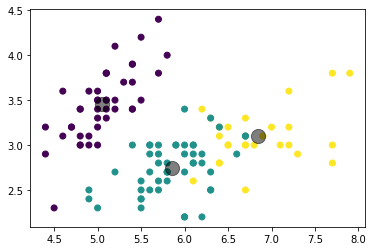

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from sklearn import metrics

#Load the diabetes dataset
iris=datasets.load_iris()

iris_X_train,iris_X_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,test_size=0.2)

#KMeans 演算法
kmeans =KMeans(n_clusters=3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]#花萼長度
y1=iris_X_train[:,1]#花萼寬度
plt.scatter(x1,y1,c=y_predict,cmap='viridis')#畫每一筆位置
centers=kmeans.cluster_centers_ #每個分類中心點
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)#劃出中心點
plt.show()#顯示圖片

In [ ]:
###其他算法分析資料
##差異哪邊

支援向量機(Support Vector Machine)介紹


https://kknews.cc/zh-tw/tech/gq2vol.html
各方法優缺


----------SVM支持向量機---------

高準確率，為避免過擬合提供了很好的理論保證，而且就算數據在原特徵空間線性不可分，只要給個合適的核函數，它就能運行得很好。在動輒超高維的文本分類問題中特別受歡迎。可惜內存消耗大，難以解釋，運行和調參也有些煩人，而隨機森林卻剛好避開了這些缺點，比較實用。

優點

可以解決高維問題，即大型特徵空間；

能夠處理非線性特徵的相互作用；

無需依賴整個數據；

可以提高泛化能力；

缺點

當觀測樣本很多時，效率並不是很高；

對非線性問題沒有通用解決方案，有時候很難找到一個合適的核函數；

對缺失數據敏感；

對於核的選擇也是有技巧的（libsvm中自帶了四種核函數：線性核、多項式核、RBF以及sigmoid核）：

第一，如果樣本數量小於特徵數，那麼就沒必要選擇非線性核，簡單的使用線性核就可以了；

第二，如果樣本數量大於特徵數目，這時可以使用非線性核，將樣本映射到更高維度，一般可以得到更好的結果；

第三，如果樣本數目和特徵數目相等，該情況可以使用非線性核，原理和第二種一樣。

對於第一種情況，也可以先對數據進行降維，然後使用非線性核，這也是一種方法。



--------K-Means聚類-------
先找中心點在分區，用調整參數改變準確度


之前寫過一篇關於K-Means聚類的文章，博文連結：機器學習算法-K-means聚類。關於K-Means的推導，裡面有著很強大的EM思想。

優點

算法簡單，容易實現 ；

對處理大數據集，該算法是相對可伸縮的和高效率的，因為它的複雜度大約是O(nkt)，其中n是所有對象的數目，k是簇的數目,t是疊代的次數。通常k<<n。這個算法通常局部收斂。

算法嘗試找出使平方誤差函數值最小的k個劃分。當簇是密集的、球狀或團狀的，且簇與簇之間區別明顯時，聚類效果較好。

缺點

對數據類型要求較高，適合數值型數據；

可能收斂到局部最小值，在大規模數據上收斂較慢

K值比較難以選取；

對初值的簇心值敏感，對於不同的初始值，可能會導致不同的聚類結果；

不適合於發現非凸面形狀的簇，或者大小差別很大的簇。

對於 噪聲 和孤立點數據敏感，少量的該類數據能夠對平均值產生極大影響。


原文網址：https://kknews.cc/tech/gq2vol.html



In [32]:
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split ##匯入k-means 函式庫
from sklearn.cluster import KMeans
from sklearn import metrics

#取得花資料
iris=datasets.load_iris()
##拆分資料80:20，訓練與測試用 2類標籤答案
iris_X_train,iris_X_test,iris_y_train,iris_y_test=train_test_split(iris.data,iris.target,test_size=0.2)
##KMeans 演算法 2類標籤答案
kmeans=KMeans(n_clusters=3) ##修改成3 較準
kmeans_fit=kmeans.fit(iris_X_train) ###訓練，沒有標籤答案

print("實際",iris_y_train)##顯示標籤答案
print("預測",kmeans_fit.labels_)##顯示預測答案

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)#顯示調整後的預測

score=metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))

print('準確率{0:f}'.format(score))#顯示準確率




實際 [2 2 1 1 2 0 1 2 2 0 0 1 1 1 2 0 2 0 1 0 0 1 2 2 2 2 2 2 2 2 0 2 0 2 1 1 0
 0 2 1 0 0 1 2 0 1 1 0 0 1 0 0 1 0 0 0 2 2 2 2 2 1 0 0 0 1 1 1 1 1 2 0 1 1
 2 2 1 2 1 0 2 2 1 1 2 1 0 0 1 0 1 0 2 2 2 0 2 0 0 0 0 1 1 0 2 2 2 0 1 2 1
 0 1 1 1 2 0 1 1 0]
預測 [2 2 0 0 2 1 0 2 2 1 1 0 0 0 2 1 2 1 0 1 1 0 0 2 2 0 2 2 0 2 1 2 1 2 0 0 1
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 2 2 2 2 2 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 2 0 1 2 2 2 2 2 0 1 1 0 1 0 1 2 0 0 1 2 1 1 1 1 0 0 1 2 2 2 1 0 2 0
 1 0 0 0 2 1 0 0 1]
調整 [2 2 0 0 2 1 0 2 2 1 1 0 0 0 2 1 2 1 0 1 1 0 2 2 2 2 2 2 2 2 1 2 1 2 0 0 1
 1 2 0 1 1 0 2 1 0 0 1 1 0 1 1 0 1 1 1 2 2 2 2 2 0 1 1 1 0 0 0 0 0 2 1 0 0
 2 2 0 2 0 1 2 2 0 0 2 0 1 1 0 1 0 1 2 2 2 1 2 1 1 1 1 0 0 1 2 2 2 1 0 2 0
 1 0 0 0 2 1 0 0 1]
準確率0.900000


In [18]:
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [20]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_std,y_train['target'].values)

SVC(kernel='linear', probability=True)

In [22]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [23]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [24]:

error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [25]:
svm.predict_proba(X_test_std)

array([[0.94985297, 0.05014703],
       [0.00857166, 0.99142834],
       [0.97360739, 0.02639261],
       [0.00741273, 0.99258727],
       [0.01878219, 0.98121781],
       [0.12610794, 0.87389206],
       [0.98407608, 0.01592392],
       [0.00556592, 0.99443408],
       [0.00988799, 0.99011201],
       [0.01746697, 0.98253303],
       [0.02668235, 0.97331765],
       [0.03294324, 0.96705676],
       [0.00919635, 0.99080365],
       [0.98019193, 0.01980807],
       [0.96226255, 0.03773745],
       [0.94223841, 0.05776159],
       [0.98805058, 0.01194942],
       [0.87748912, 0.12251088],
       [0.98023607, 0.01976393],
       [0.95643608, 0.04356392],
       [0.94985297, 0.05014703],
       [0.03788156, 0.96211844],
       [0.94981634, 0.05018366],
       [0.04061008, 0.95938992],
       [0.96727796, 0.03272204],
       [0.96956822, 0.03043178],
       [0.96223473, 0.03776527],
       [0.02318452, 0.97681548],
       [0.04349504, 0.95650496],
       [0.00691346, 0.99308654]])

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


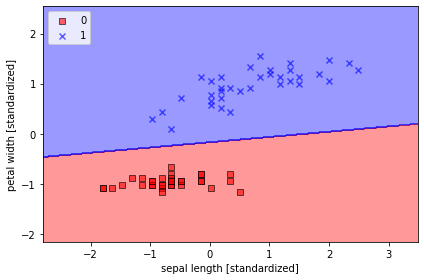

In [27]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


上面資料不確定到底是如何運作的
但最後應該是預測正確或錯誤 predict_proba 將其繪製成圖
以下搜尋到清楚 的svm方式實作鳶尾花分類案

In [ ]:
###https://pyecontech.com/2020/04/11/python_svm/
###https://iter01.com/425579.html

Python實作 支援向量機 SVM
用鳶尾花分類案例在Python中實作SVM
以圖像化的方式呈現
運用不同核函數之間的差異

(一) 引入模組
(二) 準備資料
1.下載練習資料
2.將樣本分成訓練集與測試集
(三) 建立模型
1. 核函數 kernel
2. 參數C
3. 參數gamma
4. 其他補充
(四) 預測
(五) 準確度分析


In [1]:
###https://github.com/pyinvest/ml_toturial/blob/master/SVM.ipynb

###MY COMMENT
###引入一些模組 此處是使用svm模型
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()
features=iris.data
target=iris.target

In [17]:
iris

###MY COMMENT
###特徵花萼的長度 寬度 花瓣的長度 寬度
#feature_names': ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

###target 0 1 2 分別代表3種不同的鳶尾花
#target_names': array(['setosa', 'versicolor', 'virginica']

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
features

###MY COMMENT
#iris.data
###特徵資料取出 會是一個整齊的陣列

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
target

###MY COMMENT
#iris.target
###0 1 2 對應3種不同的花

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
target_names=iris.target_names
labels=target_names[target] ###轉為文字型態
###MY COMMENT
###要畫圖 2維的 原有四種特徵 取兩種


In [5]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [6]:
###擷取資料
setosa_petal_length=features[labels=='setosa',2] ##找setosa 花瓣的長度擷取出來
setosa_petal_width=features[labels=='setosa',3]
setosa=np.c_[setosa_petal_length,setosa_petal_width]  ###c 兩個特徵結合
versicolor_petal_length=features[labels=='versicolor',2]
versicolor_petal_width=features[labels=='versicolor',3]
versicolor=np.c_[versicolor_petal_length,versicolor_petal_width]
virginica_petal_length=features[labels=='virginica',2]
virginica_petal_width=features[labels=='virginica',3]
virginica=np.c_[virginica_petal_length,virginica_petal_width]

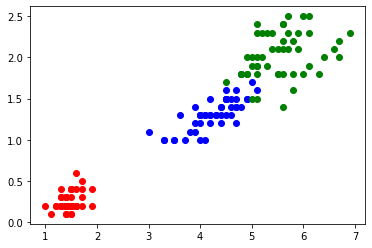

In [7]:
###MY COMMENT
##畫散佈圖
##x軸 花瓣長度 y軸 花瓣寬度
plt.scatter(setosa[:,0],setosa[:,1],color='red') ###setosa類
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')###versicolor類
plt.scatter(virginica[:,0],virginica[:,1],color='green')###virginica類

In [8]:
###樣本放到training_data裡
training_data=np.r_[setosa, versicolor, virginica] ###r 結合
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

In [9]:
###開始建模
clf=svm.LinearSVC()
clf.fit(training_data,training_labels)

LinearSVC()

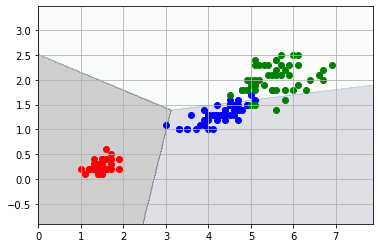

In [10]:
###找最大最小值
training_x_min=training_data[:,0].min()-1
training_x_max=training_data[:,0].max()+1
training_y_min=training_data[:,1].min()-1
training_y_max=training_data[:,1].max()+1
grid_interval=0.02  ###切割

###對樣本點預測
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)  ###contourf等高線圖
plt.autoscale()
plt.grid()
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')
plt.show()

###svm裡重要參數
重要參數
C: 懲罰係數，C愈大代表容忍錯誤的程度愈低，愈容易造成過度擬和的問題。  ###預設為1
gamma: 決定支援向量的多寡，影響訓練速度與預測速度 ('scale','auto')
kernel: 決定不同的核函數，如: linear, poly, rbf, sigmoid等等  ###可自行設定

In [11]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(setosa[:,0],setosa[:,1],color='red')
    plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
    plt.scatter(virginica[:,0],virginica[:,1],color='green')
    plt.title(title)
    plt.show()

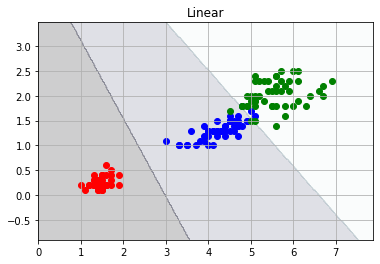

In [12]:

clf=svm.SVC(kernel='linear')  ##sigmoid / poly 等其他類 ##不同演算法
clf.fit(training_data,training_labels)
SVM_plot(clf,'Linear')

In [13]:
###MY COMMENT
###特徵改成花萼 的長度 寬度
#換特徵
setosa_sepal_length=features[labels=='setosa',0]
setosa_sepal_width=features[labels=='setosa',1]
setosa=np.c_[setosa_sepal_length,setosa_sepal_width]
versicolor_sepal_length=features[labels=='versicolor',0]
versicolor_sepal_width=features[labels=='versicolor',1]
versicolor=np.c_[versicolor_sepal_length,versicolor_sepal_width]
virginica_sepal_length=features[labels=='virginica',0]
virginica_sepal_width=features[labels=='virginica',1]
virginica=np.c_[virginica_sepal_length,virginica_sepal_width]

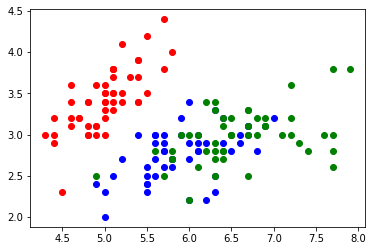

In [14]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='blue')
plt.scatter(virginica[:,0],virginica[:,1],color='green')

In [ ]:
###MY COMMENT
##使用花萼 當特徵 2 3類較分不出來

In [15]:
training_data=np.r_[setosa, versicolor, virginica]
training_labels=np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]

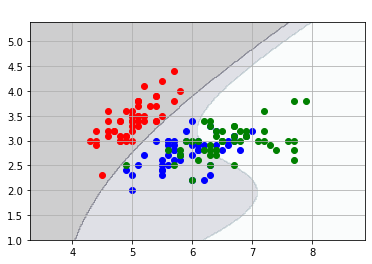

In [16]:
clf=svm.SVC(kernel='poly',C=1000) ###c越大分得越精確
clf.fit(training_data,training_labels)
SVM_plot(clf,' ')

In [20]:
#整體流程
#Step1. 下載資料
iris=datasets.load_iris()
X=iris.data
y=iris.target
#Step2. 區分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
#Step3. 建模
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)

#Step4. 預測
clf.predict(X_test)
#Step5. 準確度分析
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.9777777777777777


In [ ]:
###用svm模型 準確度其實相當高
###可以自己選用不同的特徵
###選用不同的核函數 調整c值的大小